1. Consider the two dimensional data matrix [(2, 1), (3, 4), (5, 0), (7, 6), (9, 2)].Implement principal component analysis. Use this to obtain the feature in transformed 2D feature space. Plot the scatter plot of data points in both the original as well as transformed domain.

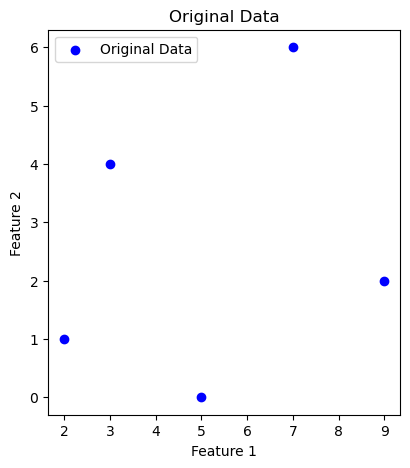

In [11]:
import numpy as np
import matplotlib.pyplot as plt 
data = np.array([(2, 1), (3, 4), (5, 0), (7, 6), (9, 2)])
mean = np.mean(data, axis=0)
centered_data = data - mean
cov_matrix = np.cov(centered_data, rowvar=False)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]
transformed_data = np.dot(centered_data, eigenvectors)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(data[:, 0], data[:, 1], c='blue', label='Original Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Original Data')
plt.legend()

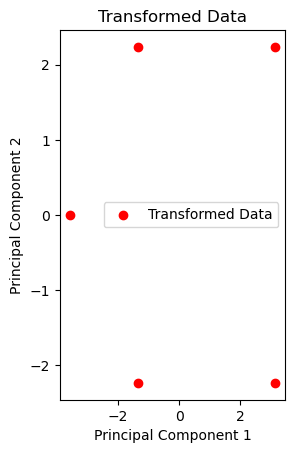

In [4]:
plt.subplot(1, 2, 2)
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c='red', label='Transformed Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Transformed Data')
plt.legend()

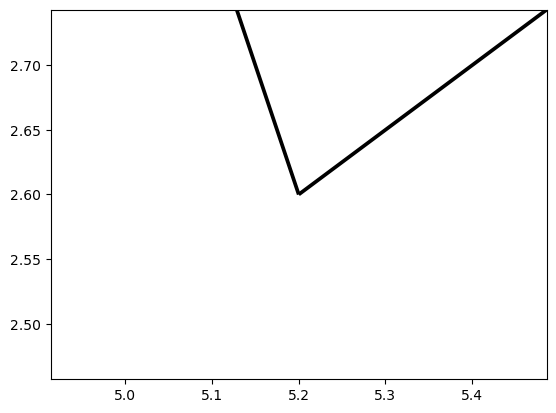

In [5]:
plt.quiver(mean[0], mean[1], eigenvectors[0, 0], eigenvectors[1, 0], angles='xy', scale_units='xy', scale=1, color='black')
plt.quiver(mean[0], mean[1], eigenvectors[0, 1], eigenvectors[1, 1], angles='xy', scale_units='xy', scale=1, color='black')

In [7]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

2. Implement Principal Component Analysis Algorithm and use it to reduce dimensions of Iris Dataset (from 4D to 2D). Plot the scatter plot for samples in the transformed domain with different colour codes for samples belonging to different classes.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd
import string
import warnings

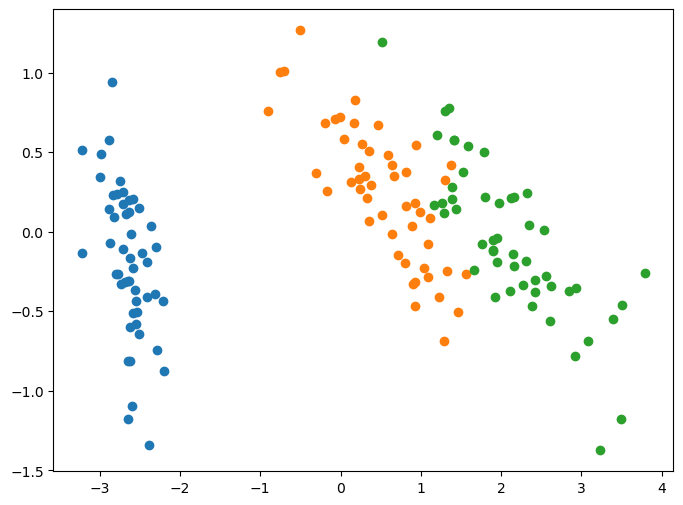

In [17]:
iris = load_iris()
data = iris.data
target = iris.target
mean = np.mean(data, axis=0)

centered_data = data - mean
cov_matrix = np.cov(centered_data, rowvar=False)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix) 
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]
top_eigenvectors = eigenvectors[:, :2]
transformed_data = np.dot(centered_data, top_eigenvectors)
plt.figure(figsize=(8, 6))
for label in np.unique(target):
        plt.scatter(transformed_data[target == label, 0], transformed_data[target == label, 1], label=f'Class {label}')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


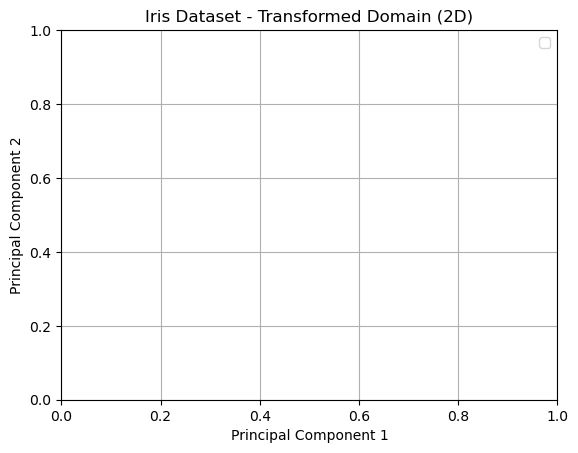

In [15]:
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Iris Dataset - Transformed Domain (2D)')
plt.legend()
plt.grid(True)
plt.show()